# EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [2]:
date_start = dt.datetime(1994, 1, 1)
date_end = dt.datetime(2005, 1, 1)

In [3]:
ixic = yf.download('^IXIC', date_start, date_end, auto_adjust=True)
ixic_full = yf.download('^IXIC', period='max', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
ixic.head()

,Open,High,Low,Close,Volume
Date,,,,,
1994-01-03,774.109985,777.289978,768.409973,770.760010,253020000
1994-01-04,771.429993,774.780029,771.020020,774.280029,298600000
1994-01-05,775.229980,778.210022,773.690002,778.049988,349880000
1994-01-06,780.359985,781.210022,778.250000,780.409973,349210000
1994-01-07,779.289978,783.390015,778.200012,782.940002,330060000


<AxesSubplot:xlabel='Date'>

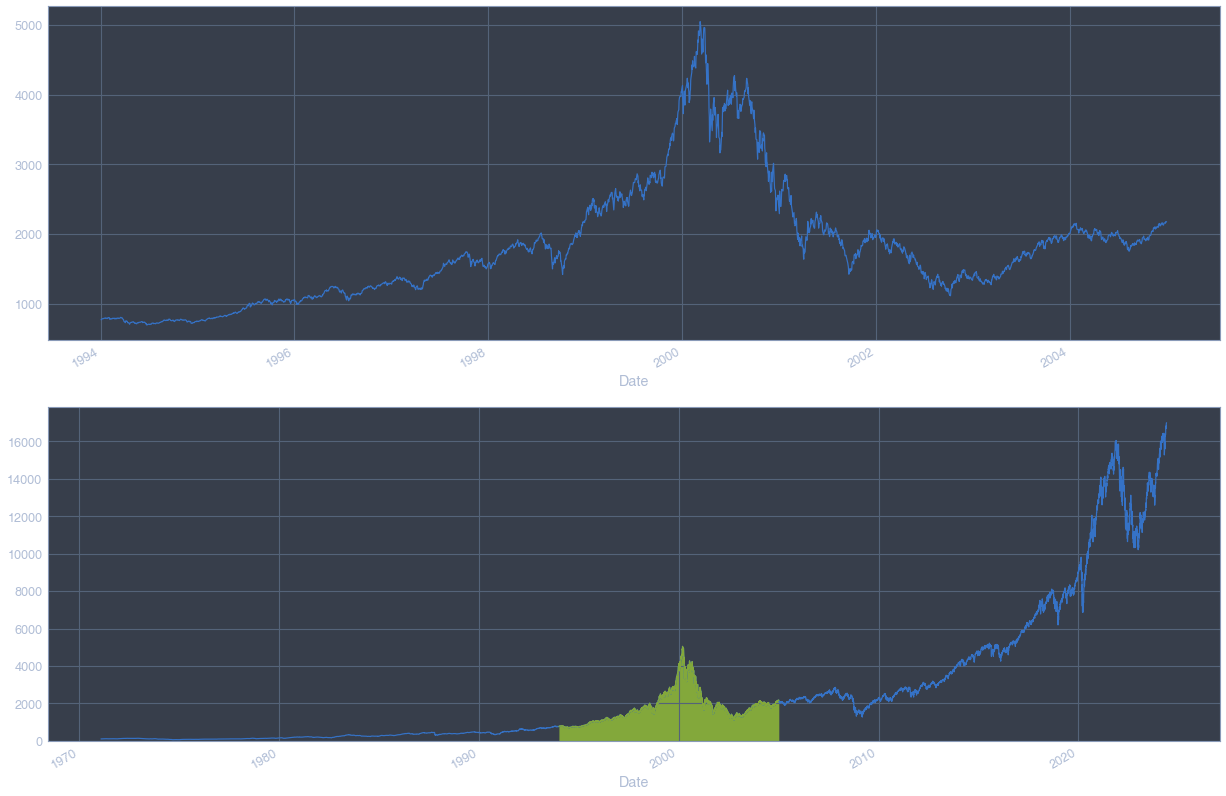

In [5]:
fig, ax = plt.subplots(2, figsize=(21, 15))
ixic['Close'].plot(ax=ax[0])
ixic_full['Close'].plot(ax=ax[1])
ixic['Close'].plot(kind='area', ax=ax[1])

In [12]:
# blue chips
csco = yf.download('CSCO', period='max', auto_adjust=True)
intc = yf.download('INTC', period='max', auto_adjust=True)
orcl = yf.download('ORCL', period='max', auto_adjust=True)
amzn = yf.download('AMZN', period='max', auto_adjust=True)

# crash
# ipet = yf.download('IPET', period='max', auto_adjust=True)
# wbvn = yf.download('WBVN', period='max', auto_adjust=True)
# mcip = yf.download('MCIP', period='max', auto_adjust=True)
# lmc = yf.download('LMC', period='max', auto_adjust=True) # +
# mppp = yf.download('MPPP', period='max', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AMZN')

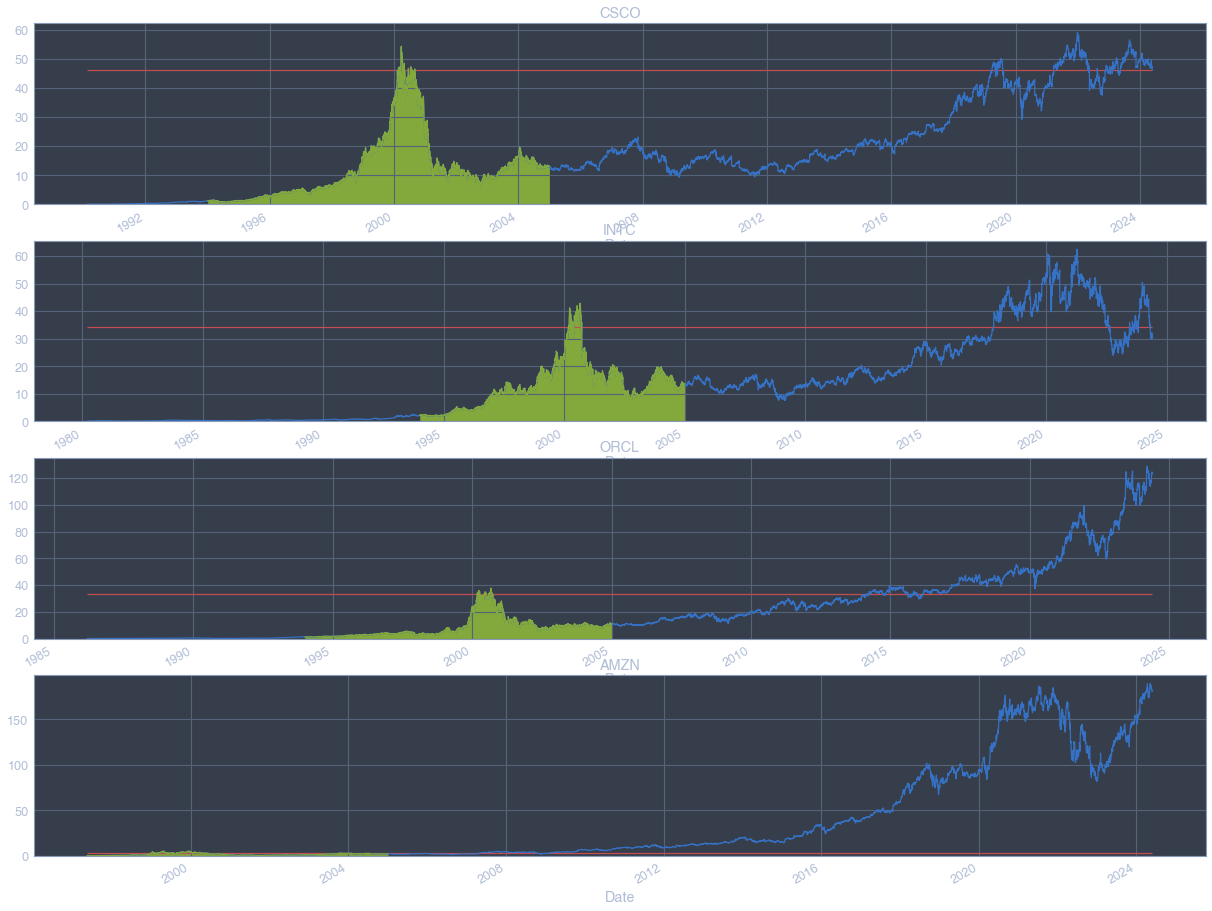

In [33]:
max_price = ixic[ixic['Close'] == ixic['Close'].max()].index

fig, ax = plt.subplots(4, figsize=(21, 17))
csco['Close'].plot(ax=ax[0])
csco.loc[ixic.index]['Close'].plot(kind='area', ax=ax[0])
ax[0].hlines(y=csco.loc[max_price]['Close'], xmin=csco.index[0], xmax=csco.index[-1], color='r')
ax[0].set_title('CSCO')

intc['Close'].plot(ax=ax[1])
intc.loc[ixic.index]['Close'].plot(kind='area', ax=ax[1])
ax[1].hlines(y=intc.loc[max_price]['Close'], xmin=intc.index[0], xmax=intc.index[-1], color='r')
ax[1].set_title('INTC')

orcl['Close'].plot(ax=ax[2])
orcl.loc[ixic.index]['Close'].plot(kind='area', ax=ax[2])
ax[2].hlines(y=orcl.loc[max_price]['Close'], xmin=orcl.index[0], xmax=orcl.index[-1], color='r')
ax[2].set_title('ORCL')

amzn['Close'].plot(ax=ax[3])
amzn.loc[:ixic.index[-1]]['Close'].plot(kind='area', ax=ax[3])
ax[3].hlines(y=amzn.loc[max_price]['Close'], xmin=amzn.index[0], xmax=amzn.index[-1], color='r')
ax[3].set_title('AMZN')
